In [1]:
import string
from collections import Counter

from pathlib import Path
import matplotlib.pyplot as plt
from unidecode import unidecode
import numpy as np

from pandas import read_csv, DataFrame

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


"""
Exploratory analysis of the dataset.
"""

'\nExploratory analysis of the dataset.\n'

In [21]:
# Dataset import and general info
ddf = read_csv("../data_root/data/raw/wine_dataset.csv")
print(ddf.shape)
print(ddf.columns)

(10000, 14)
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


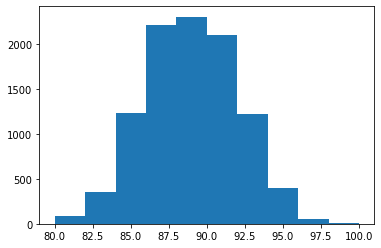

In [3]:
# Outcome distribution. Normal-like. Ranges between 80 and 100 only. 
# Could the general range between 0 and 100 instead? 
plt.hist(ddf['points'])
plt.show()

Total distinct including missing: 38
Missing: 6

us 4153
france 1734
italy 1477
spain 525
portugal 423
chile 356
argentina 309
austria 269
germany 165
australia 162
south africa 115
new zealand 104
israel 52
greece 34
canada 17
bulgaria 13
romania 11
hungary 10
uruguay 9
england 8
slovenia 7
croatia 7
mexico 6
turkey 6
missing 6
moldova 4
lebanon 3
georgia 3
serbia 2
czech republic 2
macedonia 1
brazil 1
cyprus 1
india 1
switzerland 1
armenia 1
peru 1
morocco 1


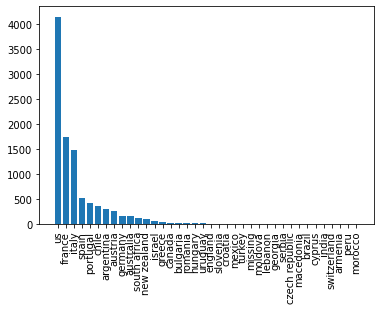

In [4]:
#
country_counts = ddf['country'].fillna("missing").str.lower().apply(unidecode).value_counts()
countries = country_counts.keys()
print(f"Total distinct including missing: {len(countries)}")

countries_n_na = ddf['country'].isna().sum()
print(f"Missing: {countries_n_na}\n")

for count, countc in zip(countries, country_counts):
    print(count, countc)

plt.bar(range(len(countries)), country_counts, tick_label=countries)
plt.xticks(rotation=90)
plt.show()


In [5]:
# TODO: to_lower, delete accents
# designation_counts = ddf['designation'].str.normalize('NFKD').value_counts(dropna=False)

designation_counts = ddf['designation'].fillna("missing").str.lower().apply(unidecode).value_counts()
designations = designation_counts.keys()
print(f"Total distinct including missing: {len(designations)}")

designations_n_na = ddf['designation'].isna().sum()
print(f"Missing: {designations_n_na}\n")

for desi, desic in zip(designations, designation_counts):
    print(desi, desic)


Total distinct including missing: 5356
Missing: 2829

missing 2829
reserve 183
reserva 104
estate 94
estate grown 57
riserva 50
barrel sample 43
brut 40
estate bottled 32
gran reserva 26
dry 26
vieilles vignes 25
crianza 24
brut rose 22
old vine 20
vintage 14
extra dry 13
tradition 13
cuvee prestige 13
rose of 13
estate reserve 12
rose 12
estate vineyard 11
unoaked 10
stillwater creek vineyard 9
semi-dry 9
single vineyard 8
barrel fermented 8
limited release 8
premium 8
classic 8
colheita 8
traditions 8
cannubi 8
durell vineyard 7
prestige 7
collection 7
made with organic grapes 7
late bottled vintage 7
tinto 7
grand reserve 7
gap's crown vineyard 6
blanc de blancs brut 6
rosado 6
vendimia seleccionada 6
boushey vineyard 6
monte rosso vineyard 6
roble 6
sierra madre vineyard 6
dutton ranch 6
bussia 6
private reserve 6
cuvee 6
bien nacido vineyard 6
estate vineyards 6
marques de casa concha 5
blanc de blancs 5
signature 5
conner lee vineyard 5
family reserve 5
passito 5
barrel select 5


brauneberger juffer spatlese 2
natural 2
original vines 2
legendary estate series 2
lois 2
torre del falasco 2
mate's vineyard 2
berardenga 2
hope family vineyard 2
slh 2
la rocca 2
les galets 2
nuthouse lone star vineyard 2
paxis 2
bricco pernice 2
ancestral 2
negre 2
hors classe les menetrieres 2
cartizze 2
costa 2
jochinger pichl federspiel 2
to kalon vineyard reserve 2
les vergelesses premier cru 2
oldfield series 2bench 2
sv estate 2
decouverte 2
premium brut rose 2
bedrock 2
legado reserva 2
classique mourvedre-syrah-grenache 2
notre dame des champs 2
white elephant 2
hallberg vineyard 2
backbone 2
getrank 2
ascent one-half mile closer to the moon 2
catarina 2
seeberg reserve 2
tinto cuvee mosteiro 2
varanda do conde 2
selva 2
casteller reitsteig trocken 2
le grand bois 2
casa de santar reserva 2
garnacha 2
winemaker's blend 2
versace 2
prelude 2
las madres vineyard 2
dreamfish 2
steinertal smaragd 2
don maximiano founder's reserva 2
fondo filara 2
les grandes vignes 2
sybarite 2

tre gatti vineyard 1
les damodes premier cru 1
fletcher's 1
steinert 1
pegrandi 1
samorens 1
greco di tufo 1
loibner frauenweingarten federspiel 1
lily hill estate 1
adega de pegoes 1
la voute 1
clos mireille 1
rr 1
j.d. hurley griva vineyard 1
dark star red 1
delfina's vineyard 1
cooper ranch 1
unconditional 1
le serole 1
vilata old vines 1
1844 reserve 1
popa branco 1
portal da aguia tinto 1
tinto figuero 4 1
cuvee elisabeth 1
cresta ridge vineyard 1
reserve des vignerons 1
terrunyo el triangulo vineyard block: 28 1
cuthbert amery vineyard 1
reserve de satis 1
pie delle vigne cerasuolo rose 1
colson canyon vineyard 1
maestro collection ranch no. 5 1
coup de foudre 1
la comme premier cru 1
clone 174 1
justice vineyard 1
rive di col san martino brut 26deg primo 1
the whip 1
sestina 1
leithaberg 1
paparuda rezerva 1
domaine du haut morlu 1
otre 1
lapaccio 1
toscoforte 1
piesporter goldtropfchen spatlese 1
blend of malbecs 1
vallon d'or 1
pinta negra tinto 1
rosso bello 1
boon fly's hill

block 500 1
coudel mor reserva 1
critone 1
dutton-thomas road vineyard 1
two range 1
chakalaka 1
blewitt springs 1
intense brut 1
lote 44 1
emmy 1
rosewynn vineyard 1
cuvee marilyn 1
le petit bois 1
vigna d'la roul 1
domaine de la crea les beaumonts 1
lila 1
flight song 1
eagle & plow block 93 cavalie vineyard 1
chaleur estate blanc 1
piesporter goldtropfchen kabinett 1
la meirana del comune di gavi 1
vertigo bianco 1
cantos de valpiedra 1
tinto 6 meses en barrica 1
bossman 1
d'o 1
ruxton vineyard 1
ciconia the reserva 1
volcanic red dry 1
cuvee selection 1
fleurette 1
afterglow estate dessert 1
gris blanc 1
sandstone 1
rsvp lewelling vineyard 1
lieu-dit harth - cuvee carolin 1
black diamond 1
domaine la rabiotte 1
don isidro 1
horse heaven vineyard 1
fiore 1
sanford & benedict 1
le rose gourmand de la maison blanche 1
sweeney vineyard 1
reserve dry 1
weinkellerei 1
corralillo 1
branco reserva 1
tate 1
red rock terrace 1
acciderba 1
gloria 1
les larmes de bacchus 1
vigna elena riserva 

robinson vineyard 1
janus 1
rose imperial 1
giuliani vineyard 1
ovello 1
indian wells 1
7200 range 30 west 1
zomborka 1
horseshoe bend vineyard 1
delicio 1
ona special reserve 1
rocky knoll 1
pourquois pas 1
fairytale 1
cuvee du roi clovis 1
estela solera 1
buissonnier pinot noir 1
hein family vineyard 1
magnacosta 1
paso a paso 1
smaragd terrassen 1
black label club 1
rhapsody in red 1
rage 1
toro tinto 1
double lariat 1
block b paderewski vineyard 1
casa americo branco reserva 1
florieres 1
wetland winemaker's selection 1
carmenere 1
gsm grenache-shiraz-mourvedre 1
blue hall vineyard 1
conde vilar branco 1
marianne's 1
la fleur lily semi-dry 1
pont caffino sur lie 1
estate bottled rose of 1
o made from organic grapes 1
gran cermeno crianza 1
abbassi vineyard 1
hedgehog vineyard 1
audace brut rose 1
four shadows 1
kalk und schiefer 1
bottega vinaia 1
red dot 1
fresc 1
les armoiries de belcier 1
alleanza 1
westhofen kirchspiel gg trocken 1
brut reserva 1
inspiration 7.5.3 1
claudia's b

voigt family vineyards 1
saignee rose 1
tavola 1
reserva privada 1
e prove 1
quinta do cachao 1
flax vineyard 1
l'ange et luce 1
brau 1
stone corral vineyard 1
big shot vineyard 1
cattrall brothers vineyard 1
old soul 1
winemaker's reserve zora's estate vineyard 1
belsito 1
ascent 1
kellerberg smaragd 1
terroir series edicion limitada finca las piedras 1
santa rosa reserva 1
rosenbourg 1
kyndall's reserve dutton ranch 1
aveta 1
wes cameron ranch halfshell white french 1
subduction 1
luckystone 1
coroa d'ouro 1
reserva especial 1
cape winemakers guild sophia 1
lucy rose of 1
chateau de mercey 1
metodo classico 1
two ton 1
inox unoaked 1
parcel 9 1
opere trevigiane riserva brut 1
chateau saint seurin 1
eggo filoso 1
cantina tre serre 1
muschelkalk 1
giacone 1
dealer's choice 1
botricelli 1
uv lancel creek vineyard 1
col disore 1
pentad red wine 1
osterberg grand cru 1
i lasi 1
commodore perry 1
steinfeld 1
les natures 1
clos rochette 1
vulcano 1
the broad-side 1
the villain 1
basalt bloc

biutiful 1
charles vineyard clone 05 1
legende 1
celebrate 1
ode d'aydie 1
national geographic ocean reserve blanc de blancs 1
lot 5 1
romanico canosa riserva 1
yellow rock vineyard 1
conquest 1
nation 1
far away vineyard 1
dark chocolate 1
block g+i 1
la mouline 1
virginia 1
quinta do moinho rose bruto 1
blue label 1
achleiten smaragd 1
gavin vineyard 1
privilege 1
grande cuvee 1
la bella fernanda 1
la dame rousse 1
dragon's tooth red wine 1
feral evergreen vineyard 1
jamison valley vineyard destein estate 1
vina pomal gran riserva 1
ruit hora 1
old vines dry 1
1rdrs4 1
la contrada 1
century vine reserve 1
adrien's blend 1
elyssia gran cuvee brut 1
ludovic de beausejour 1
lettere 1
trigrammaton 1
mandolas dry 1
alta luna phases 1
sepia reserva 1
sisu 1
vista alegre vintage 1
millesime premier cru extra brut 1
quinta do pego grande reserva 1
salmos perpetual 1
torricella 1
cristalino brut nature 1
alexis 1
schrazhofberger spatlese 1
clos de la brosse 1
rocche riviera 1
altenberg de ber

Missing: 677


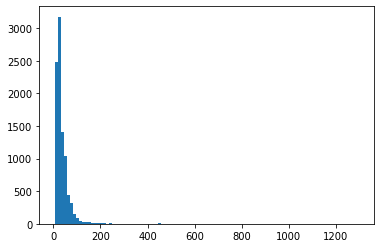

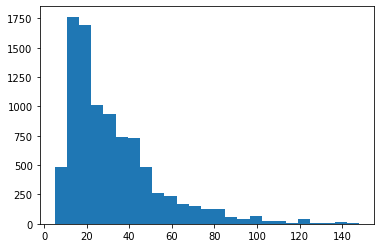

In [6]:
price_n_na = ddf['price'].isna().sum()
print(f"Missing: {price_n_na}")

plt.hist(ddf['price'], bins=100)
plt.show()
plt.hist(ddf[ddf['price'] < 150]['price'], bins=25)
plt.show()

In [7]:
province_counts = ddf['province'].fillna("missing").value_counts()
provinces = province_counts.keys()
print(f"Total distinct including missing: {len(provinces)}")

provinces_n_na = ddf['province'].isna().sum()
print(f"Missing: {provinces_n_na}\n")

for prov, provc in zip(provinces, province_counts):
    print(prov, provc)

Total distinct including missing: 249
Missing: 6

California 2753
Washington 658
Tuscany 460
Bordeaux 458
Oregon 409
Burgundy 321
Northern Spain 306
Piedmont 280
Mendoza Province 277
New York 210
Alsace 197
Veneto 189
Northeastern Italy 164
Loire Valley 143
Champagne 134
Sicily & Sardinia 126
Provence 112
Southern Italy 111
Southwest France 108
Catalonia 97
Rhône Valley 95
Douro 94
Central Italy 88
South Australia 87
Mosel 82
Alentejano 75
Beaujolais 69
Burgenland 65
Virginia 64
Colchagua Valley 63
Marlborough 57
Port 53
Lombardy 52
Maipo Valley 52
France Other 51
Casablanca Valley 51
Tejo 48
Languedoc-Roussillon 46
Maule Valley 42
Niederösterreich 42
Lisboa 36
Galicia 35
Stellenbosch 34
Levante 33
Central Spain 33
Other 32
Central Valley 32
Kamptal 30
Galilee 30
Vinho Verde 28
Wachau 28
Western Cape 26
Rheingau 26
Dão 25
Kremstal 25
Victoria 24
Cachapoal Valley 21
Western Australia 20
Australia Other 20
Curicó Valley 19
Idaho 19
Rheinhessen 17
Pfalz 17
Central Otago 15
British Columbi

In [8]:
region1_counts = ddf['region_1'].fillna("missing").value_counts()
region1 = region1_counts.keys()
print(f"Total distinct including missing: {len(region1)}")

region1_n_na = ddf['region_1'].isna().sum()
print(f"Missing: {region1_n_na}\n")

for reg, regc in zip(region1, region1_counts):
    print(reg, regc)

Total distinct including missing: 725
Missing: 1664

missing 1664
Napa Valley 350
Columbia Valley (WA) 345
Russian River Valley 235
California 212
Willamette Valley 188
Mendoza 186
Alsace 172
Paso Robles 169
Champagne 134
Finger Lakes 130
Barolo 116
Rioja 116
Brunello di Montalcino 115
Sonoma Coast 114
Toscana 101
Chianti Classico 91
Santa Barbara County 84
Sonoma County 82
Carneros 74
Santa Lucia Highlands 72
Dry Creek Valley 67
Barbaresco 65
Sicilia 64
Sta. Rita Hills 64
Walla Walla Valley (WA) 63
Alexander Valley 62
Côtes de Provence 60
Yakima Valley 60
Central Coast 59
Santa Maria Valley 57
Sonoma Valley 57
Alto Adige 56
Ribera del Duero 54
Horse Heaven Hills 53
Santa Ynez Valley 52
Lodi 52
Livermore Valley 48
North Fork of Long Island 47
Santa Cruz Mountains 47
Bordeaux Blanc 46
Virginia 45
Red Mountain 44
Saint-Émilion 44
Anderson Valley 44
Dundee Hills 43
Cava 43
Cahors 43
Bordeaux 42
Sancerre 39
Chablis 39
Washington 38
Oregon 37
Bordeaux Supérieur 35
Mendocino County 35
Sierra

In [9]:
# Many missing values. Discard for the moment.
region2_counts = ddf['region_2'].fillna("missing").value_counts()
region2 = region2_counts.keys()
print(f"Total distinct including missing: {len(region2)}")

region2_n_na = ddf['region_2'].isna().sum()
print(f"Missing: {region2_n_na}\n")

for reg, regc in zip(region2, region2_counts):
    print(reg, regc)

Total distinct including missing: 18
Missing: 6147

missing 6147
Central Coast 847
Sonoma 685
Columbia Valley 611
Napa 521
Willamette Valley 259
California Other 214
Finger Lakes 142
Sierra Foothills 105
Napa-Sonoma 87
Central Valley 71
Southern Oregon 60
Oregon Other 59
North Coast 59
Long Island 54
Washington Other 46
South Coast 19
New York Other 14


In [10]:
taster_counts = ddf['taster_name'].fillna("missing").value_counts()
tasters = taster_counts.keys()
print(f"Total distinct including missing: {len(tasters)}")

taster_n_na = ddf['taster_name'].isna().sum()
print(f"Missing: {taster_n_na}\n")

for tast, tastc in zip(tasters, taster_counts):
    print(tast, tastc)

Total distinct including missing: 19
Missing: 1985

missing 1985
Roger Voss 1956
Michael Schachner 1208
Kerin O’Keefe 861
Paul Gregutt 747
Virginie Boone 719
Matt Kettmann 462
Joe Czerwinski 386
Sean P. Sullivan 361
Anna Lee C. Iijima 335
Jim Gordon 325
Anne Krebiehl MW 295
Lauren Buzzeo 156
Susan Kostrzewa 80
Jeff Jenssen 43
Mike DeSimone 40
Alexander Peartree 26
Carrie Dykes 10
Fiona Adams 5


In [11]:
twitter_counts = ddf['taster_twitter_handle'].fillna("missing").value_counts()
twitter = twitter_counts.keys()
print(f"Total distinct including missing: {len(twitter)}")

twitter_n_na = ddf['taster_twitter_handle'].isna().sum()
print(f"Missing: {twitter_n_na}\n")

for twit, twitc in zip(twitter, twitter_counts):
    print(twit, twitc)

Total distinct including missing: 15
Missing: 2356

missing 2356
@vossroger 1956
@wineschach 1208
@kerinokeefe 861
@paulgwine  747
@vboone 719
@mattkettmann 462
@JoeCz 386
@wawinereport 361
@gordone_cellars 325
@AnneInVino 295
@laurbuzz 156
@worldwineguys 83
@suskostrzewa 80
@bkfiona 5


In [12]:
# When the taster name is missing, the twitter hadnle is as well.
# Only need to use one of those.
miss_taster = ddf['taster_name'].isna() & ~ddf['taster_twitter_handle'].isna()
print(miss_taster.sum())

0


In [13]:
# Title without 
# - numbers
# - geographical information
# Because those are already in other columns
title_counts = ddf['title'].str.replace('(\d+ )', '')\
                           .str.replace('\((.+)\)\s*$', '')\
                           .str.replace('\s{2,}', ' ')\
                           .str.lower().value_counts(dropna=False)

titles = title_counts.keys()
print(f"Total distinct including missing: {len(titles)}")

title_n_na = ddf['title'].isna().sum()
print(f"Missing: {title_n_na}\n")

for tit, titc in zip(titles, title_counts):
    print(tit, titc)

Total distinct including missing: 9437
Missing: 0

dr. h. thanisch  5
roche de bellene vieilles vignes  5
firesteed pinot noir  4
sokol blosser pinot gris  3
chateau ste. michelle sauvignon blanc  3
obalo rioja 3
castle rock pinot noir  3
l. tramier & fils collection  3
jean-luc and paul aegerter vieilles vignes  3
vignerons de buxy buissonnier  3
bonacchi casalino  3
poggio al tesoro sondraia  3
château simard saint-émilion 3
bell cabernet sauvignon  3
tamarack cellars cabernet franc  3
columbia crest reserve cabernet sauvignon  3
willamette valley vineyards estate pinot noir  3
joseph mellot domaine des emois  3
domaines devillard le renard  3
chelsea goldschmidt merlot  3
pedroncelli east side vineyards sauvignon blanc  3
simonsig redhill pinotage  3
santa carolina vsc red  3
château beychevelle saint-julien 3
baron philippe de rothschild mouton cadet  3
prinsi gallina  3
santa carolina reserva de familia carmenère  3
sequel syrah  3
ca' del bosco nv cuvée prestige sparkling  3
lawr

tiamo sangiovese  1
three rivers syrah  1
michael david 6th sense syrah  1
georges duboeuf château des vierres  1
nessa albariño  1
jacopo biondi-santi braccale  1
terra d'alter alvarinho  1
center of effort pinot noir  1
nicolas idiart château caillivet cuvée in  1
drei donà tenuta la palazza vigneti delle rosenere blanc d'r white  1
st. francis sauvignon blanc  1
tamarack cellars dubrul vineyard reserve red red  1
ciabot berton utin nebbiolo  1
wunsch & mann saint-rémy gewurztraminer  1
torii mor olson estate vineyard chardonnay  1
tenuta rapitalà hugonis red  1
corley proprietary red wine red  1
cave des grands crus blancs minéral  1
fattoria di montemaggio chianti classico 1
michel redde et fils les tuilières  1
marrenon grande toque rosé  1
madroña dry riesling  1
hillinger sauvignon blanc  1
michael pozzan annabella chardonnay  1
charles krug limited release x clones estate cabernet sauvignon  1
paripaso chardonnay  1
leese-fitch zinfandel  1
efeste final-final cabernet-syrah  1


kendall-jackson vintner's reserve sauvignon blanc  1
terra d'alter tinto red  1
foley steel chardonnay  1
josé maria da fonseca josé de sousa red  1
south stage g-s-m  1
corton andré les damodes premier cru  1
morandé house of morandé red  1
j. portugal ramos vila santa aragonês  1
château de santenay pommard 1
walla walla vintners dolcetto  1
château sainte barbe merlot  1
syncline cuvée elena red  1
castello di querceto chianti classico 1
cru vin dogs maboroshi vineyard pinot noir  1
prunotto bussia  1
domaine jean foillard côte du puy  1
pepper bridge pepper bridge vineyard red  1
donna olimpia millepassi  1
brecon estate albariño  1
recanati kosher reserve shiraz  1
domaine du grand montmirail cuvée vieilles vignes  1
la fiammenga paion  1
tenute orestiadi molino a vento bio nero d'avola  1
babcock slice of heaven rita's crown vineyard pinot noir  1
bodegas franco-españolas rioja bordón crianza  1
still waters pinot gris  1
cesari il bosco  1
loring wine company durell vineyard cha

lava cap estate bottled barbera  1
bouchard père & fils réserve  1
rainstorm pinot noir  1
domaine carneros le rêve blanc de blancs sparkling  1
chains north merlot  1
garcía figuero viñas viejas  1
four sisters chardonnay  1
amavi syrah  1
mettler family vineyards epicenter zinfandel  1
record family wines merlot  1
meyer family cellars syrah  1
fratelli alessandria san lorenzo di verduno  1
ramos-pinto duas quintas reserva red  1
colombera & garella pizzaguerra  1
grans-fassian trittenheimer apotheke beerenauslese riesling  1
waters forgotten hills syrah  1
bernardus chardonnay  1
château les croisille cuvée prestige malbec  1
grayson lot zinfandel  1
dezzani stardè  1
montelle chambourcin  1
magistrate reserve chardonnay  1
morgan clones pinot noir  1
rui roboredo madeira beyra branco colheita white  1
gustafson family mountain cuvée estate zinfandel  1
paul jaboulet aîné secret de famille viognier  1
domaine la colombette notorious pink grenache rosé  1
château rollan de by médoc 1

domaine des béguineries réserve de satis  1
le casematte nero d'avola  1
bella grace vermentino  1
elyse zinfandel  1
boeckel vieilles vignes sylvaner  1
viña requingua los riscos pinot grigio  1
seacampo casa américo branco reserva encruzado  1
circadia cabernet sauvignon  1
giuseppe apicella costa d'amalfi tramonti red  1
joseph faiveley chambolle-musigny 1
loring wine company pinot noir  1
boscarelli nocio dei boscarelli  1
kenwood six ridges cabernet sauvignon  1
pepi pinot grigio  1
corteforte vigneti di osan  1
domaine parigot clos de la perrière  1
lichen estate blanc de gris pinot gris  1
pfeffingen dry riesling  1
sebastopol dutton ranch pinot noir  1
rex hill jacob-hart estate vineyard pinot noir  1
casa santa vitória versátil tinto red  1
castel firmian pinot grigio  1
kenefick ranch caitlin's select cabernet franc  1
kuenhof silvaner  1
r&a; pfaffl zeiseneck grüner veltliner  1
van duzer dijon blocks pinot noir  1
les vignobles gueissard cuvée g rosé  1
feiler-artinger zwei

jaffurs thompson vineyard petite sirah  1
domaine guillot-broux les gennievrières  1
rozes nv terras do grifo pink  1
hafner kashmir red  1
château ponzac maintenant malbec  1
stefano berti bartimeo sangiovese  1
putah creek syrah  1
les voleurs hurst vineyard pinot noir  1
balletto bcd vineyard estate pinot noir  1
poggio nardone rivus sangiovese  1
spellbound reserve petite sirah  1
spy valley envoy single vineyard sauvignon blanc  1
château lafite rothschild pauillac 1
morro bay split oak estates sur lie chardonnay  1
mottura le pitre primitivo  1
whitecliff vineyard estate bottled chardonnay  1
four vines truant old vine zinfandel  1
caymus cabernet sauvignon  1
longevity merlot  1
tenuta rapitalà grand cru chardonnay  1
sundance reserva cabernet sauvignon  1
casaloste rosso maniero red  1
cherubino wilyabrup cabernet sauvignon  1
cor cellars mckinley springs vineyard petit verdot  1
koonowla riesling  1
st. francis tres viejos old vine zinfandel  1
château barreyres haut-médoc 1
a

feudo maccari rosé  1
celani family vineyards ardore cabernet sauvignon  1
kilikanoon oracle shiraz  1
clarendelle rosé  1
krutz stagecoach vineyard cabernet sauvignon  1
eleven elephant mountain vineyard roussanne  1
luigi oddero & figli rocche riviera  1
domaine fernand engel meyerhof pinot noir  1
savannah-chanelle garys' vineyard pinot noir  1
ketcham estate pinot noir  1
santa rita reserva chardonnay  1
van duzer riesling  1
bello family vineyards reserve cabernet sauvignon  1
schäfer mettenheimer schlossberg auslese riesling  1
château léoville poyferré saint-julien 1
gundlach bundschu estate chardonnay  1
pieropan vigna garzon  1
southard lawrence vineyard syrah  1
vinkara reserve narince  1
prinz salm kirchberg bingen trocken gg riesling  1
hamilton rosé of malbec  1
vignobles rené renon château charmant  1
santa ema reserve chardonnay  1
d'arenberg the derelict vineyard grenache  1
bravium abbassi vineyard chardonnay  1
cà salina nv siròcol extra dry  1
ad lib cruel mistress p

casebianche cumalè fiano  1
guarachi family pinot noir  1
native rancho ontiveros vineyards pinot noir  1
howard park miamup chardonnay  1
corte giacobbe soave 1
domaine pinson cuvée mademoiselle  1
château de santenay vieilles vignes  1
bortolin angelo sommaval rive di guia  1
betwixt chardonnay  1
mercer canyons chardonnay  1
alcardet sommelier tempranillo-syrah-garnacha rosé  1
pascual toso estate bottled torrontés  1
château du barrailh cuvée collection prestige  1
tower estate riesling  1
benegas juan benegas malbec  1
drumheller chardonnay  1
clos figueras font de la figuera red  1
markham cabernet sauvignon  1
dujac fils & pere chambolle-musigny 1
eos zinfandel  1
declaration cabernet sauvignon  1
commanderie de la bargemone cuvée elisabeth red  1
goldschmidt game ranch cabernet sauvignon  1
apaltagua reserva rosé  1
or haganuz amuka series marus single vineyard shiraz  1
st. innocent justice vineyard pinot noir  1
bargetto mount eden clone pinot noir  1
pratsch steinberg reserv

casar de burbia tebaida mencía  1
monte da penha reserva red  1
dois irmãos two brothers' private selection pinot noir  1
roessler red label pinot noir  1
quinta das arcas conde vilar branco white  1
chamisal vineyards stainless unoaked chardonnay  1
nino negri vigneto fracia  1
scott paul audrey pinot noir  1
lazy creek five barrel pinot noir  1
e. guigal saint-joseph 1
pepper bridge merlot  1
indigené edna valley pinot noir  1
errazuriz wild ferment chardonnay  1
murphy-goode merlot  1
johanneshof reinisch frauenfeld reserve st. laurent  1
madonna nera brunello di montalcino 1
chehalem rr riesling  1
ousterhout vines jenna's vineyard rosé of pinot noir  1
kozlović teran  1
stephen vincent chardonnay  1
patriarche père et fils brut  1
riverbench bedrock chardonnay  1
maximin grünhäuser pinot blanc  1
de wetshof bon vallon chardonnay  1
talbott r&v sleepy hollow vineyard late harvest riesling  1
elias mora reserva  1
boschkloof syrah  1
casarena estate bottled cabernet sauvignon  1
san

peñalba herraiz aptus meses en barrica  1
merry cellars stillwater creek vineyard syrah  1
henri bourgeois la bourgeoise  1
golan heights winery nv gilgal brut sparkling  1
jean-luc and paul aegerter les vaucrains premier cru  1
delille grand ciel cabernet sauvignon  1
margan saignée rosé shiraz  1
sparkling pointe blanc de blancs chardonnay  1
canoe ridge estate grown block cabernet sauvignon  1
rutherford hill chardonnay  1
bodegas riolanc vendimia seleccionada  1
judith beck weissburgunder  1
roblar noir collection sauvignon blanc  1
misiones de rengo gran reserva cuvée chardonnay  1
emiliana novas gran reserva pinot noir  1
ghost pines chardonnay  1
friedrich-wilhelm-gymnasium fritz willi riesling  1
lemelson chestnut hill vineyard pinot noir  1
donnafugata brut metodo classico sparkling  1
coelho atração pinot noir  1
cooper-garrod finley vineyard pinot noir  1
joseph cattin pur de roche riesling  1
stags' leap winery ne cede malis petite sirah  1
cordero di montezemolo monfallett

markham the altruist calistoga estate vineyard cabernet sauvignon  1
mcgrail reserve cabernet sauvignon  1
château les valentines la caprice de clémentine rosé  1
clendenen bricco buon natale nebbiolo  1
mikami vineyards zinfandel  1
for a song cabernet sauvignon  1
le brun de neuville nv tendre rosé brut  1
fulkerson estate muskat ottonel  1
tenuta rapitalà campo reale nero d'avola  1
château malescot saint-exupery barrel sample  1
peachy canyon west side cabernet sauvignon  1
wagner ice wine riesling  1
cedar view winery zinfandel  1
netzl rubin carnuntum zweigelt  1
vasse felix heytesbury chardonnay  1
gruber röschitz grüner veltliner  1
francis tannahill jacob-hart vineyard pinot gris  1
crayelle cellars bishop's block red  1
collovray et terrier domaine des deux roches vieilles vignes  1
château moncontour cuvée prédilection  1
toad hollow reserve richard mcdowell vineyard merlot  1
salomon-undhof hochterrassen grüner veltliner  1
31st state pinot noir  1
mirassou riesling  1
doma

ancient peaks cabernet sauvignon  1
chateau d'angludet margaux 1
chateau morrisette dry rosé  1
soléna guadalupe pinot noir 1
pence ranch fugio pinot noir  1
santa julia organica cabernet sauvignon  1
emile balland le beaux jours sauvignon blanc  1
durigutti bonarda  1
château phélan-ségur la croix bonis  1
gladium crianza tempranillo  1
pine ridge dijon clones chardonnay  1
bokisch tempranillo  1
la storia block merlot  1
streamside sauvignon blanc  1
hannes reeh rohstoff chardonnay  1
clos de l'oratoire des papes white  1
lo domeni le clos malbec  1
roessler hein family vineyard pinot noir  1
tenuta di capraia chianti classico 1
brander syrah  1
sextant reserve chardonnay  1
moura basto colheita seleccionada red  1
condesa eylo verdejo  1
gorman black curtain reserve syrah  1
st. urbans-hof schodener saarfeilser marienberg spätlese erste lage riesling  1
paul buisse sauvignon blanc  1
columbia crest reserve grenache  1
san pedro limited edition cabernet sauvignon-syrah  1
eredi enzo 

silver thread stv estate vineyard pinot noir  1
frieden-berg nitteler leiterchen novum elbling  1
iron horse unoaked chardonnay  1
red xs nv red  1
dante robere element lv red  1
pine & brown cabernet sauvignon  1
hawkins cellars reserve syrah  1
bodegas vegalfaro rebel.lia red  1
concha y toro block terrunyo sauvignon blanc  1
santa ema reseve barrel select carmenère  1
davis family soul patch estate grown pinot noir  1
sleight of hand the magician's assistant rosé cabernet franc  1
grey wolf cellars sentinelle white  1
domaine laporte les duchesses  1
tiedemann signature series red  1
vivera salisire bianco  1
pratsch lange ried riesling  1
tasca d'almerita sallier de la tour la monaca syrah  1
château peyros tannat-cabernet  1
bertani le quaiare lugana  1
coyote canyon coyote canyon vineyard roussanne  1
doukénie cabernet sauvignon-syrah  1
trinity vineyards pinot noir  1
shalestone synergy red  1
kitá camp vineyard sauvignon blanc  1
bracco la mont-brach white  1
eagle castle barbe

lombard et cie nv brut nature grand cru  1
peri bigogno montenetto di brescia 1
rôtie cellars grenache blanc  1
vignerons de buxy les chaniots premier cru  1
domaine rené bouvier champ salomon  1
merryvale merlot  1
domaine la consonnière red  1
ram's gate bush crispo vineyards pinot noir  1
masi colbaraca classico  1
garber & goltz mats zornberg grüner veltliner  1
alamos red  1
dutton estate kyndall's reserve dutton ranch chardonnay  1
carbone stupor mundi riserva  1
montonale montunal  1
cristom estate pinot noir  1
ck mondavi willow springs pinot grigio  1
testarossa chardonnay  1
baglio del cristo di campobello laudàri chardonnay  1
enkidu bedrock zinfandel  1
frank family reserve cabernet sauvignon  1
louis latour château de blagny premier cru  1
sineann cabernet sauvignon  1
offley vintage  1
château la louvière pessac-léognan 1
cuttings cabernet sauvignon  1
monticello vineyards corley reserve cabernet sauvignon  1
whitecliff vineyard reserve riesling  1
domaine françoise andré

rex hill pinot noir  1
covey run semillon-chardonnay  1
montgras antu red  1
montevetrano red  1
podere rocche dei manzoni vigna d'la roul  1
tenuta di sesta brunello di montalcino 1
quinta da rede rede branco white  1
alta vista premium torrontés  1
rancho sisquoc pinot noir  1
firriato cavanera ripa di scorciavacca  1
bodegas san valero particular old vine garnacha  1
cantina del taburno bue apis  1
domaine louis moreau vaudésir grand cru  1
tv celadon grenache blanc  1
paradiso di frassina rosso di montalcino 1
city winery of new york reserve alder springs vineyard cabernet franc  1
ferrari-carano trésor red  1
dîner chenin blanc  1
le morette mandolara  1
panther creek reserve pinot noir  1
del dotto sauvignon blanc  1
château henri bonnaud rosé  1
washington hills chardonnay  1
caves du val de france jovly sauvignon blanc  1
maggy hawk graceful lady maggy hawk estate vineyard clone pinot noir  1
angerhof tschida beerenauslese sauvignon blanc  1
lo nuevo vilata old vines monastrell

chanson père et fils clos des mouches premier cru  1
bergevin lane calico white  1
renieri chianti classico 1
grafen neipperg schwaigerner ruthe grosses gewächs trocken riesling  1
château julien private reserve merlot  1
goldschmidt vyborny vineyard plus cabernet sauvignon  1
dreaming tree crush red  1
cennatoio oro  1
cavicchioli nv robanera  1
annabella special selection pinot noir  1
naggiar estate malbec  1
cascata fireside chardonnay  1
arrocal ribera del duero 1
cairdeas nv tri red  1
chamisal vineyards estate bottled pinot noir  1
cinnabar trebbiano  1
municipal winemakers syrah  1
schug pinot noir  1
harrison reserve cabernet sauvignon  1
bodegas y viñedos rauda tinto roa reserva  1
quinta do pinto touriga nacional  1
vidon vineyard mirabelle clone pinot noir  1
lauren ashton cellars syrah  1
ellena del comune di la morra  1
continuum red  1
dr. konstantin frank pinot gris  1
tildio estate grown cabernet franc  1
redbank the long paddock pinot grigio  1
pierre sparr one white 

matteo correggia roche d'ampsej  1
leyda classic sauvignon blanc  1
raymond reserve selection cabernet sauvignon  1
brecon estate petite sirah  1
heritage road reserve shiraz  1
palaia vineyards cabernet franc  1
quartz reef nv brut méthode traditionnelle sparkling  1
dunham lewis estate vineyard riesling  1
st. francis cabernet sauvignon  1
barlow sauvignon blanc  1
huré frères nv eléments pinot meunier  1
portal del alto gran reserva chardonnay  1
gorman old scratch g-s-m  1
còlpetrone passito  1
zaca mesa mesa reserve syrah  1
domaine luc et lise pavelot corton 1
nuiton-beaunoy hautes côtes de nuits 1
villa poggio salvi brunello di montalcino 1
château de fesles bonnezeaux 1
mirassou moscato  1
nodland private blend red  1
tasca d'almerita sallier de la tour nero d'avola  1
dr. heidemanns-bergweiler bernkasteler alte badstube am doctorberg spätlese riesling  1
quinta do infantado vintage  1
elqui wines carmenère  1
wild coyote bragger syrah  1
eberle barbera  1
pulchella highs & low

Total distinct including missing: 40
Missing: 363

2012.0 1247
2014.0 1217
2013.0 1168
2011.0 964
2010.0 939
2015.0 785
2009.0 766
2008.0 567
2007.0 514
2006.0 427
nan 363
2016.0 302
2005.0 261
2004.0 144
2000.0 61
2001.0 54
1999.0 51
1998.0 45
2003.0 41
2002.0 34
1997.0 21
1995.0 8
1989.0 2
1996.0 2
1994.0 2
1966.0 1
1870.0 1
2017.0 1
1852.0 1
1990.0 1
1947.0 1
1898.0 1
1961.0 1
1992.0 1
1882.0 1
7200.0 1
1967.0 1
1984.0 1
1868.0 1
1848.0 1


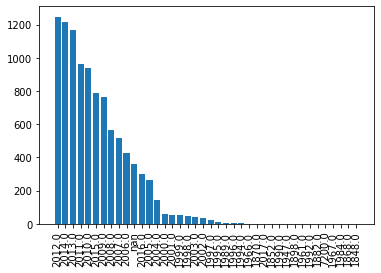

In [14]:
# Extract year from title. Year of production isusually important for wines.
# Float because int does nota allows Na
ddf['year'] = ddf['title'].str.extract('(\d{4,})').astype(float)

year_counts = ddf['year'].value_counts(dropna=False)
years = year_counts.keys()
print(f"Total distinct including missing: {len(years)}")

years_n_na = ddf['year'].isna().sum()
print(f"Missing: {years_n_na}\n")

for year, yearc in zip(years, year_counts):
    print(year, yearc)

plt.bar(range(len(years)), year_counts, tick_label=years)
plt.xticks(rotation=90)
plt.show()


In [15]:
# Check that there is not more geographical info in title than in the other columns
ddf['title_geo'] = ddf['title'].str.extract('\((.+)\)\s*$')
# ddf['title_geo'] = ddf['title'].str.extract('\(((?:.(?!\())+)\)\s*$')

geo_diff = ddf.loc[(~ ddf['title_geo'].isna()) &
                 (ddf['title_geo'] != ddf['province']) & 
                 (ddf['title_geo'] != ddf['region_1']) & 
                 (ddf['title_geo'] != ddf['region_2']),
                ['title_geo', 'province', 'region_1', 'region_2']]
print(geo_diff)


                                              title_geo            province  \
525   Erben Müller-Burggraef) 2009 Bernkasteler Bads...               Mosel   
1223                       Wolf and Falcon) White (Tejo                Tejo   
2231  Erben Müller-Burggraef) 2015 Berncasteler Grab...               Mosel   
2592              Chiara Boschis) 2005 Cannubi  (Barolo            Piedmont   
2593  Lafite) 2010 Los Vascos Sauvignon Blanc (Casab...   Casablanca Valley   
3319                 sic) Pinot Noir (Willamette Valley              Oregon   
3886                                 Ré) Malbec (Cahors    Southwest France   
4408  Erben Thanisch) 2013 Bernkasteler Badstube Kab...               Mosel   
5715         White Heart) Pinot Noir (Willamette Valley              Oregon   
6180  Lafite) 2010 Los Vascos Grande Reserve Caberne...    Colchagua Valley   
6378  UPVG) 2012 Estacion el Porvenir Sauvignon Blan...  Valle de Guadalupe   
7368  Erben Müller-Burggraef) 2006 Berncasteler Doct

In [16]:
variety_counts = ddf['variety'].fillna("missing").value_counts()
varieties = variety_counts.keys()
print(f"Total distinct including missing: {len(varieties)}")

varieties_n_na = ddf['variety'].isna().sum()
print(f"Missing: {varieties_n_na}\n")

for var, varc in zip(varieties, variety_counts):
    print(var, varc)

Total distinct including missing: 333
Missing: 0

Pinot Noir 1015
Chardonnay 950
Cabernet Sauvignon 766
Red Blend 702
Bordeaux-style Red Blend 525
Riesling 393
Sauvignon Blanc 377
Syrah 324
Rosé 278
Merlot 221
Nebbiolo 220
Zinfandel 209
Sangiovese 200
Malbec 193
Portuguese Red 192
Sparkling Blend 182
White Blend 174
Tempranillo 146
Rhône-style Red Blend 124
Champagne Blend 116
Pinot Gris 112
Cabernet Franc 109
Grüner Veltliner 108
Pinot Grigio 86
Bordeaux-style White Blend 80
Portuguese White 76
Gewürztraminer 70
Gamay 68
Petite Sirah 59
Port 58
Sangiovese Grosso 57
Shiraz 53
Grenache 53
Viognier 53
Chenin Blanc 51
Glera 48
Barbera 48
Carmenère 47
Pinot Blanc 40
Rhône-style White Blend 40
Tempranillo Blend 40
Corvina, Rondinella, Molinara 37
Albariño 37
Aglianico 29
Verdejo 27
Meritage 26
Nero d'Avola 24
Pinot Bianco 23
Melon 22
Moscato 22
Torrontés 21
Prosecco 20
Blaufränkisch 20
Garganega 19
Garnacha 17
Mencía 17
Zweigelt 17
Tinta de Toro 16
Mourvèdre 15
Vermentino 15
Roussanne 15
Pe

In [17]:
winery_counts = ddf['winery'].fillna("missing").value_counts(dropna=False)
wineries = winery_counts.keys()
print(f"Total distinct including missing: {len(wineries)}")

wineries_n_na = ddf['winery'].isna().sum()
print(f"Missing: {wineries_n_na}\n")

for win, winc in zip(wineries, winery_counts):
    print(win, winc)

Total distinct including missing: 5460
Missing: 0

Chateau Ste. Michelle 19
Georges Duboeuf 17
Columbia Crest 17
Lynmar 16
Concha y Toro 15
Testarossa 15
Robert Mondavi 15
DFJ Vinhos 15
Jean-Luc and Paul Aegerter 14
Williams Selyem 14
Milbrandt 14
Casca Wines 12
Dutton-Goldfield 12
Albert Bichot 11
Santa Carolina 11
Louis Latour 11
Caliterra 11
Jean-Baptiste Adam 10
Bründlmayer 10
Waterbrook 10
Merry Edwards 10
Tasca d'Almerita 10
Pedroncelli 10
Novy 10
Louis Jadot 10
Fournier Père et Fils 10
Wines & Winemakers 10
Cramele Recas 9
Rodney Strong 9
Echeverria 9
Gloria Ferrer 9
Glenora 9
D'Arenberg 9
Morandé 9
Domaines Devillard 9
Raymond 9
Iron Horse 9
Chanson Père et Fils 9
Kendall-Jackson 9
Domaine Serene 9
Trinchero 9
Boeckel 9
Golan Heights Winery 9
Gård 9
Joseph Drouhin 9
Stoller 9
Marchesi de' Frescobaldi 8
Barton & Guestier 8
Robert Hall 8
Calera 8
Willamette Valley Vineyards 8
Fenestra 8
Korbel 8
San Pedro 8
Valentin Bianchi 8
Willm 8
Finca El Origen 8
Oak Grove 8
Margerum 8
Wente

Lornano 3
Château Teyssier 3
Tomero 3
Pondera 3
Cristom 3
Columbia Winery 3
Moccagatta 3
François Millet 3
Ànima Negra 3
Domaine Specht 3
Mira 3
Dr. Hermann 3
Biondi Santi 3
Ruby Hill Winery 3
Giuseppe Cortese 3
Fetzer 3
Ferrari 3
Château Pilet 3
Quinta de Ventozelo 3
Las Positas 3
Mission Hill 3
Mocavero 3
Eight Bells 3
Wunsch & Mann 3
Le Salette 3
Sbragia 3
Emiliana 3
ZD 3
Left Coast Cellars 3
JM Cellars 3
Tenute Cisa Asinari dei Marchesi di Gresy 3
Kaleidos 3
Mezzacorona 3
Psagot 3
Graziano 3
Fornacelle 3
MacMurray Ranch 3
Clos Troteligotte 3
Orfila 3
Château d'Esclans 3
Anton Bauer 3
Gray Ghost 3
Besserat de Bellefon 3
Avanthia 3
Bischöfliche Weingüter Trier 3
Gaia Wines 3
Bernard Magrez 3
Calina 3
Finca Patagonia 3
Château Armandière 3
Blackbird Vineyards 3
Blue Rock 3
Cave de Saumur 3
Quintay 3
Keller 3
Luigi Bosca 3
Provam 3
Cuda Ridge Wines 3
Robert Craig 3
Alta Vista 3
Erath 3
Joseph Jewell 3
Maison Bleue 3
Hugel 3
Saracina 3
Ceuso 3
Doukénie 3
Château Gassier 3
Stemmari 3
Dom

Winery of Good Hope 2
Ceretto 2
Emmerich Knoll 2
Barra of Mendocino 2
Torbreck 2
San Rustico 2
Domaine Netofa 2
Terras de Alter 2
Leth 2
Charles Krug 2
Hightower 2
Campovida 2
Cordero di Montezemolo 2
Serni Fulvio Luigi 2
Freeman 2
Schloss Saarstein 2
Mount Eden Vineyards 2
Il Grappolo 2
Diamond Creek 2
Michel Lynch 2
Malibu Rocky Oaks 2
Arndorfer 2
Château de France 2
Monogamy 2
Joyce 2
Angeline 2
San Fabiano Calcinaia 2
Les Frères Perroud 2
Funky Llama 2
Domaine Carneros 2
Vicente Gandia 2
Saffron Fields Vineyard 2
A.R. Lenoble  2
Tower 15 2
Domaine de la Croix Senaillet 2
Forstreiter 2
Santa Cruz Mountain Vineyard 2
Delibori 2
Vista Hills 2
Manfred Tement 2
Le Vigne di Alice 2
Maipe 2
Tassi 2
Quinta do Casal Monteiro 2
Castello Vicchiomaggio 2
Florian Roblin 2
Peter Franus 2
Colosi 2
Dopff Au Moulin 2
Zantho 2
Arrocal 2
Matošević 2
Tenuta di Sesta 2
Couly-Dutheil 2
Barbieri 2
Fujishin 2
Domaine Vico 2
Belle Ambiance 2
Quinta da Romaneira 2
Segal's 2
Henry Earl 2
Etude 2
Wedell Cella

Tiedemann 1
Coquerel Family Wine Estates 1
Roccolo Grassi 1
Gilles Flacher 1
Toogood 1
Jeaunaux-Robin 1
Seven Oxen 1
Laurence Féraud 1
La Togata 1
Bissoni 1
Caiarossa 1
Impostino 1
Domaine Moltès 1
Ca' Rugate 1
Schweiger 1
Tatomer 1
Franci 1
General's Ridge 1
Château Paloumey 1
Cavallotto 1
Château Chauvin 1
Hunt Cellars 1
Monte Xanic 1
Trust 1
Bodegas Toro Albala, SL 1
Julien Braud 1
Lichen Estate 1
San Felice 1
Château Haut la Pointe 1
Lo Nuevo 1
Te Kairanga 1
Lambardi 1
Storybook Mountain 1
Forth 1
Ste. Chapelle 1
Livingston Moffett 1
I Sodi 1
Viña Santa Cruz 1
Tamar Ridge 1
Domaines Dominique Piron 1
Schloss Halbturn 1
Winery at La Grange 1
Argot 1
Domaines Pierre Chavin 1
Duval-Leroy 1
Lionheart 1
Steindorfer 1
Piombaia Rossi-Cantini 1
Juvé y Camps 1
Castillo Colina 1
Domaine du Petit Métris 1
Domaine Terlato & Chapoutier 1
Domaines Astruc 1
Domaine Dupré 1
Four Fields 1
Poliziano 1
Altos Las Hormigas 1
Château Clerc Milon 1
Sculpterra 1
Ferghettina 1
Clockspring 1
Horeau-Beylot 1

Château Arnaud 1
Vigna Traverso 1
Château de l'Orangerie 1
Machiavelli 1
Phillips Hill 1
Bibi Graetz 1
Epilogue 1
Skouras 1
O'Connor 1
Au Bon Climat 1
Weingut Christ 1
Maverick 1
Samuel Louis Smith 1
Il Bastardo 1
Apsara 1
Fay 1
Príncipe de Viana 1
Château Pavie 1
Magnificent Wine Company 1
Michael Florentino 1
Windstream 1
Solar de Castro 1
Summerland 1
Fattoria di Grignano 1
Alain Jaume et Fils 1
Casar de Burbia 1
Buttonwood Farm 1
Château des Landes 1
Drops of Jupiter 1
Don Miguel Gascón 1
Domaine Drouhin 1
Bouchard Aîné et Fils 1
Domaine du Castel 1
Doña Catalina 1
Fife 1
Château Lagrave 1
Au Contraire 1
Summerer 1
Flying Trout 1
Flywheel 1
Giocato 1
Château Le Bocage 1
Stone Wolf 1
Gagliole 1
Tenute Niccolai 1
Clos des Rocs 1
The Academy 1
Bodegas Riolanc 1
Vinkara 1
Rockgarden 1
Château Guilhem 1
Coeur de Terre 1
Di Majo Norante 1
Love & Squalor 1
AntoLin Cellars 1
Château d'Arcins 1
Rosemont 1
Jamieson Canyon 1
Antis 1
Malvirà 1
Grizzly Republic 1
Gruber Röschitz 1
Claudia Sprin

Montemar Wines 1
Château Trocard Monrepos 1
Alta Colina 1
Canalicchio Franco Pacenti 1
Château Figeac 1
Ca' Momi 1
J. Moss Wines 1
Graton Ridge 1
La Jara 1
Château Jaulien 1
Finca Wölffer 1
Domaine Franck Besson 1
Château Haut Grand Champ 1
Olema 1
Poggio al Vento 1
Casanova di Neri 1
Astoria 1
Pellegrini 1
Raffaldini 1
Langwerth Von Simmern 1
Windy Bay 1
Beaver Creek 1
Domaine Laougué 1
Château Preuillac 1
Manuel Seguin 1
Nasiakos 1
Millésimé 1
Cebada 1
Giant Steps 1
Château Donjon de Bruignac 1
Château Bonnet 1
Turkovich 1
Enoteca Five 1
Vatan 1
Cedar View Winery 1
Serpens 1
Kazmer & Blaise 1
Cantine Due Palme 1
Domaine Drouhin-Laroze 1
Michele Satta 1
Terra Jovia 1
Josef Brigl 1
Taverna 1
Château Haut Dina 1
Nollen 1
Des Voigne Cellars 1
Bodegas Riojanas 1
Brandini 1
Valle Secreto 1
Marques de Tomares 1
Finca la Rinconada 1
Louis and David Luneau 1
La Contea 1
Sharabella Wines 1
Keuka Lake Vineyards 1
Poderi Luigi Einaudi 1
Morse 1
Vidal-Fleury 1
Domaine Sorin 1
Crux 1
Jordan 1
Casa

FVine 1
Bodegas Muriel 1
Mas Carlot 1
Jean Milan 1
Cortijo 1
Château du Roc 1
Francesc Sanchez Bas 1
Jean Becker 1
Domaine Luc et Lise Pavelot 1
Giacomo Conterno 1
Cantina Dei Monaci 1
Trerè 1
Château Lapinesse 1
Giorgio Meletti Cavallari 1
Stickybeak 1
Don Ramón 1
Stadt Krems 1
Quimay 1
Koenig Vineyards 1
Scopone 1
Vivanco 1
Foxen 7200 1
Symington Family Estates 1
Château Cap Léon Veyrin 1
St. Hubertus 1
Leindl 1
Yellow Tail 1
Quintana de Cue 1
Duca di Salaparuta 1
McPherson 1
Saint K 1
Château La Croix Romane 1
Katarzyna 1
Hayman & Hill 1
Zerran 1
Youngberg Hill Vineyards 1
Mellisoni 1
Château les Charmes Godard 1
Feudo Disisa 1
Pere Ventura 1
Dominio de Tares 1
Yali 1
Macari 1
Elsom Cellars 1
B. Leighton 1
Barefoot Cellars 1
Tokaj Kereskedőház 1
Château Haut-Monplaisir 1
Agricole Vallone 1
Odem Mountain 1
Cinco Sentidos 1
Wohlmuth 1
Albert Morot 1
Nittnaus Hans und Christine 1
Cantina Tudernum 1
Manuel Carvalho Martins 1
Altos de San Isidro 1
Tsiakkas 1
Château de Lancyre 1
Domaine 

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stopw = set(stopwords.words('english') + list(string.punctuation)) 

def preprocess_strings(s):
    s = unidecode(s).lower()
    words = word_tokenize(s)
    sel_words = []
    for word in words:
        if word not in stopw:
            sel_words.append(ps.stem(word))
    return " ".join(sel_words)

print(ddf['description'].sample(1000).apply(preprocess_strings))


[nltk_data] Downloading package stopwords to /home/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/simon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


6829    exuber aroma suggest tropic fruit tomato vine ...
777     big well pois suppl luxuri ripe-tast mouthfil ...
8850    scent note pine needl lemon polish put concent...
5118    dri crisp miner 's made lighter style make esp...
2944    terrif valu 50-50 blend display gentl oak hint...
                              ...                        
1317    blend four major bordeaux varieti wine soft ru...
8505    tomato leaf rhubarb herbal aroma come front ti...
9754    fragrant raspberri achingli light textur tempr...
4866    unrip green note mark ripe raspberri cherri fl...
8867    combin 53 zinfandel 45 syrah 3 grenach produc ...
Name: description, Length: 1000, dtype: object
